In [1]:
from ultralytics import YOLO

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [5]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [6]:
model = YOLO('models/yolov8n-cls.pt') 
model = model.cpu()

In [7]:
target_layers =[model.model.model[-2]]

### You may get an innaccurate output at first (If it's running on GPU)

In [8]:
cam = EigenCAM(model, target_layers,task='cls')


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 43.7ms
Speed: 4.0ms preprocess, 43.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


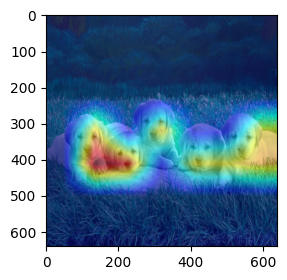

In [9]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

### Simply Re-running the cell will do the trick


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 35.4ms
Speed: 6.2ms preprocess, 35.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


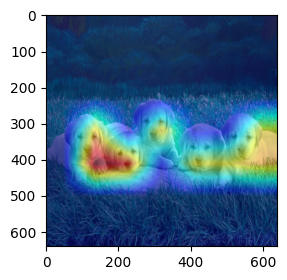

In [10]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

## You can also add multiple layers as your target layers 
#### *This may not work as you expect. It could be because of the model's architecture

In [11]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 60.2ms
Speed: 3.7ms preprocess, 60.2ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)


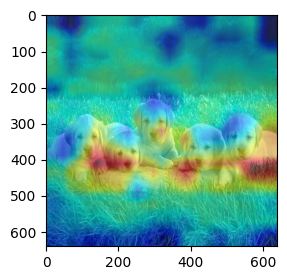

In [12]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

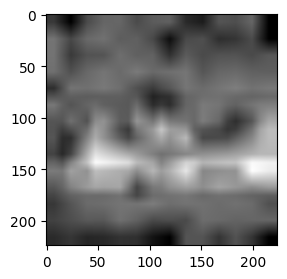

In [13]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

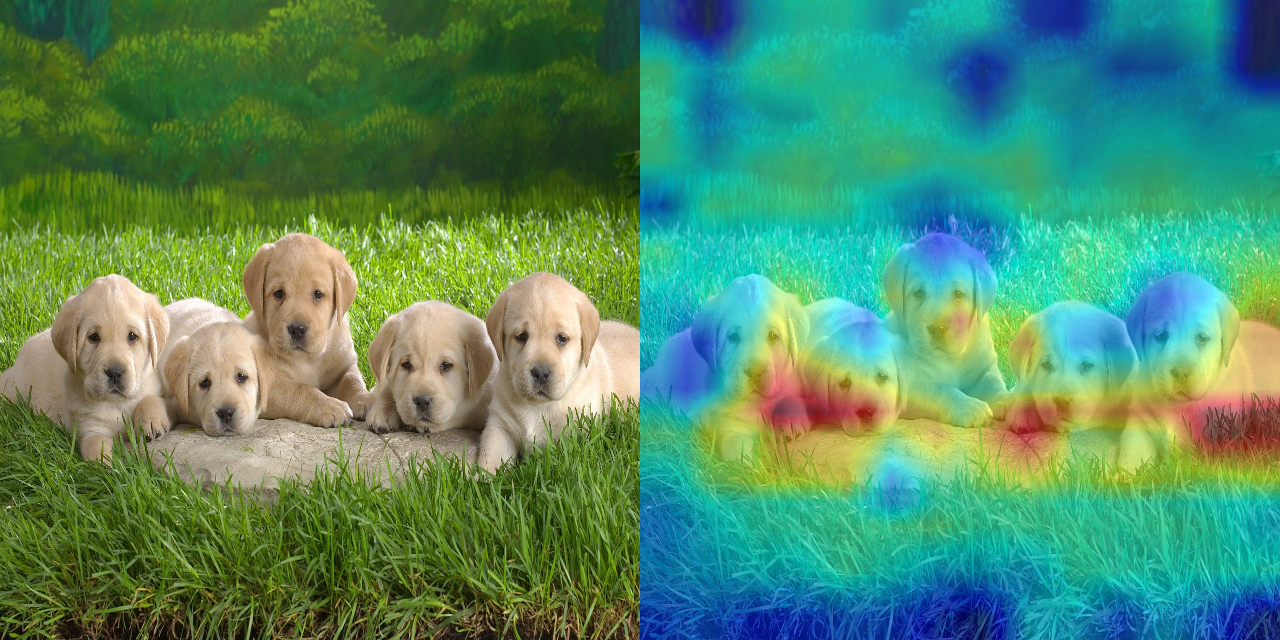

In [14]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# For the object detection model

In [15]:
model = YOLO('models/yolov8n.pt')
model = model.cpu()

In [16]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [17]:
target_layers =[model.model.model[-4]]


0: 640x640 7 dogs, 642.1ms
Speed: 9.9ms preprocess, 642.1ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


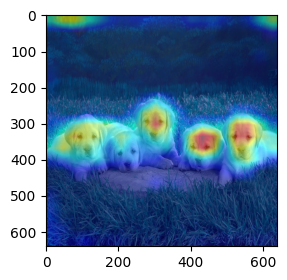

In [18]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

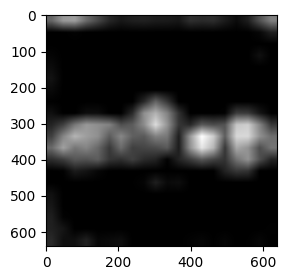

In [19]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

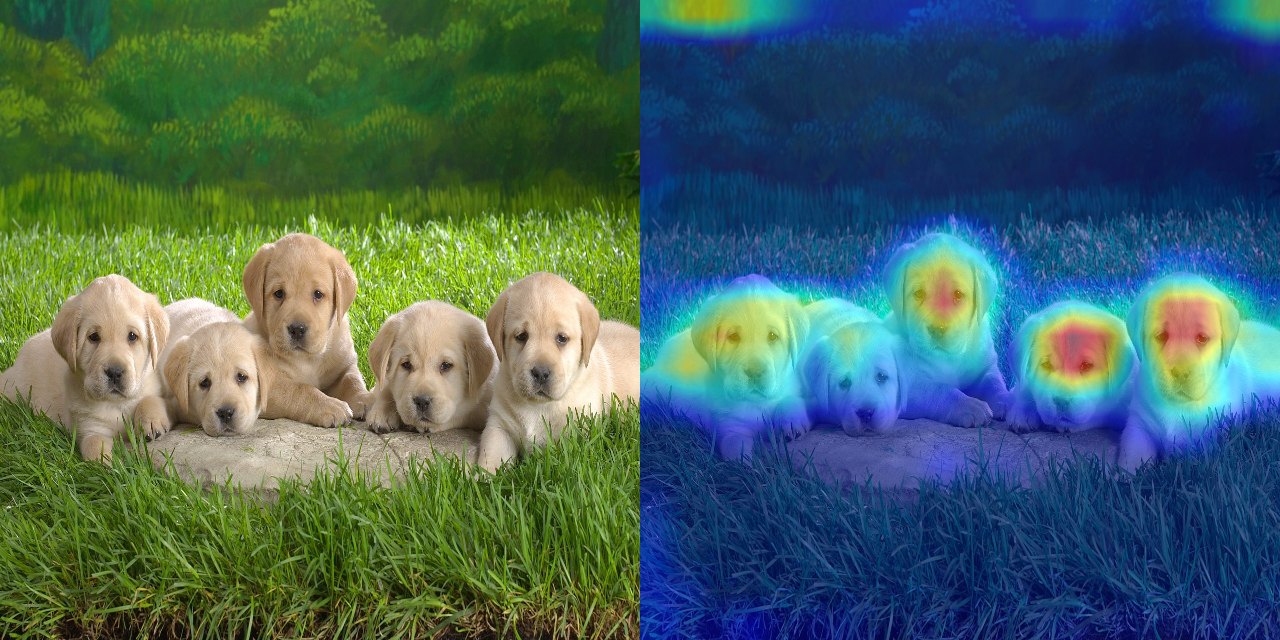

In [20]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

# For the segmentation model

### Use the same task as Object Detection

In [21]:
model = YOLO('models/yolov8n-seg.pt')
model = model.cpu()

In [22]:
img = cv2.imread('images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [23]:
target_layers =[model.model.model[-4]]


0: 640x640 4 dogs, 763.1ms
Speed: 10.3ms preprocess, 763.1ms inference, 31.5ms postprocess per image at shape (1, 3, 640, 640)


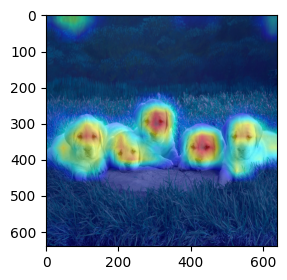

In [24]:
cam = EigenCAM(model, target_layers,task='seg')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

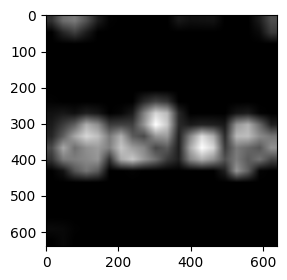

In [25]:
import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

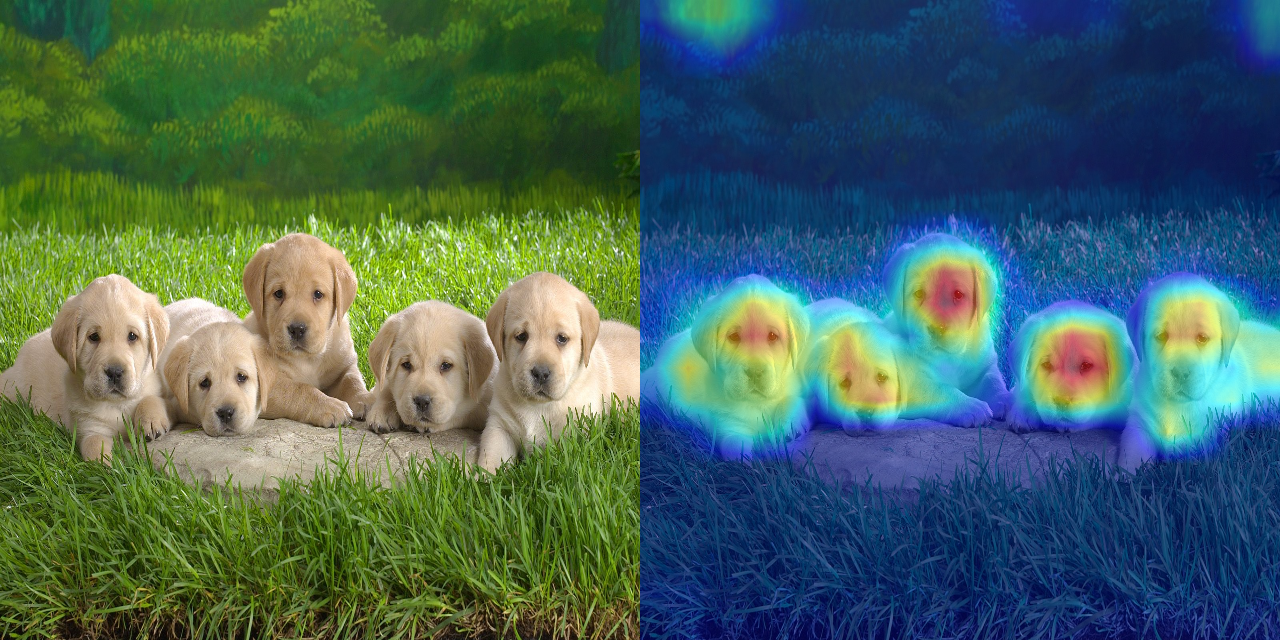

In [26]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))